In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from modify_df import ic50_binary, split_df_by_cell_line, split_df_by_drugname

from create_model import defineSplits, create_all_models, make_logres_model, make_svc_model, make_gb_model


In [3]:
df =  pd.read_csv("./data/datafile.csv")
df = ic50_binary(df)

train, test = split_df_by_drugname(df,0.8)

In [4]:
train_x = train.drop(['IC50_binary','Cell Line Name', 'Drug Name'],axis =1)
train_y = train['IC50_binary']

threshold = 1.0
splits = defineSplits(train_x,train_y)

In [5]:
create_all_models(train_x,train_y,'IC50_binary',threshold,splits,train_x.columns.tolist(),max = 100)

c:\Users\luejay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [67] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\luejay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\luejay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [67] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\luejay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\luejay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297

In [22]:
import os
from utils import calculate_feature_importance
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
test_x = test.drop(['IC50_binary','Cell Line Name', 'Drug Name'],axis =1)
test_y = test['IC50_binary']

In [10]:
model_dir = './models_made/2023_9_6_03_39_22_randvar_123_cor_1.0_yvar_IC50_binary'

In [12]:
logres_score = calculate_feature_importance(test_x,test_y, model_dir+'/logres')
gb_score = calculate_feature_importance(test_x,test_y, model_dir+'/gb')
svc_score = calculate_feature_importance(test_x,test_y, model_dir+'/svc')

In [13]:
logres_score.rename(columns={'z-score': 'Logistic Regression'}, inplace=True)
gb_score.rename(columns={'z-score': 'Gradient Boosting'}, inplace=True)
svc_score.rename(columns={'z-score': 'Support Vector Machine'}, inplace=True)

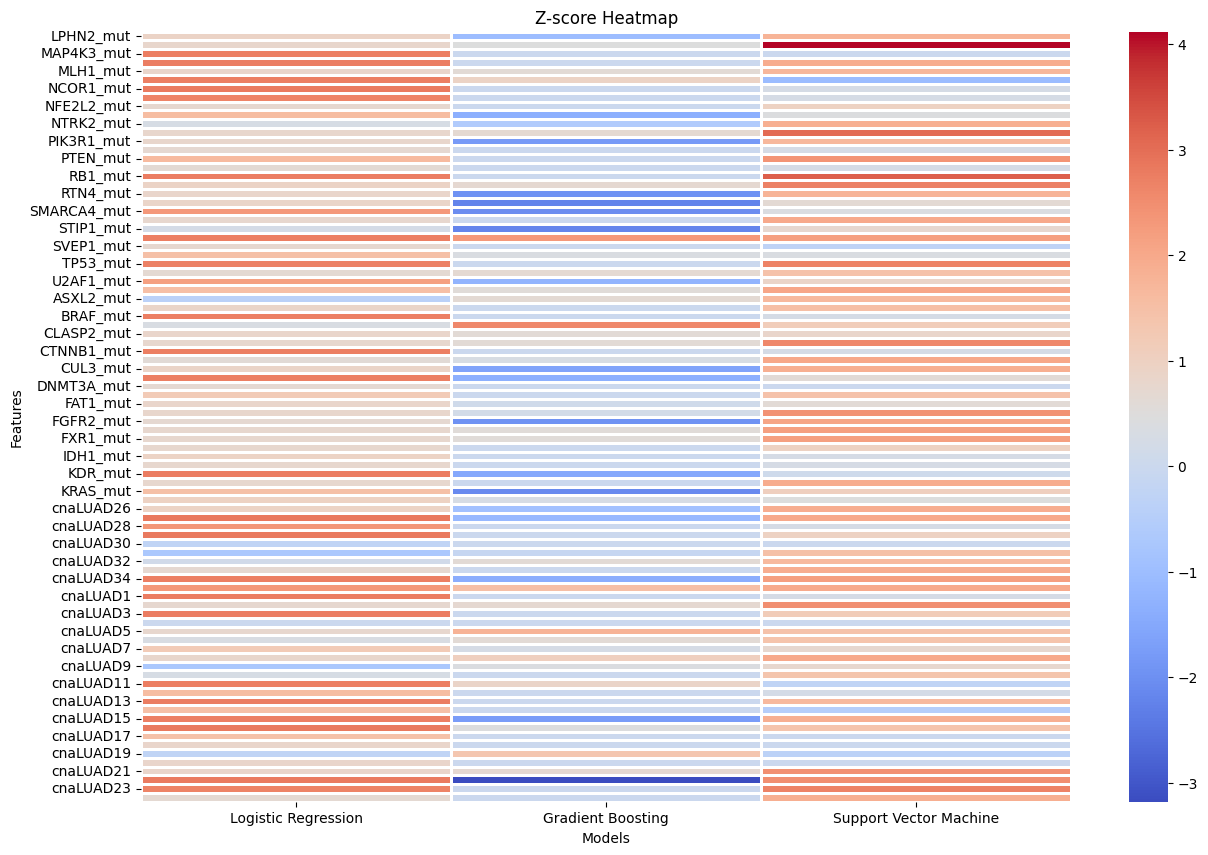

<Figure size 640x480 with 0 Axes>

In [23]:
all_score = pd.concat([logres_score,gb_score,svc_score], axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(all_score, cmap='coolwarm', annot=False, fmt=".3f", ax=ax,linewidths=1)


ax.set_xlabel("Models")
ax.set_ylabel("Features")
ax.set_title("Z-score Heatmap")

plt.show()

os.makedirs('./graphs/zscore',exist_ok=True)
